In [1]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[['petal length (cm)','petal width (cm)']].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss='hinge',C=C,dual=True,random_state=42).fit(X_scaled,y)
svc_clf = SVC(kernel='linear',C=C).fit(X_scaled,y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled,y)

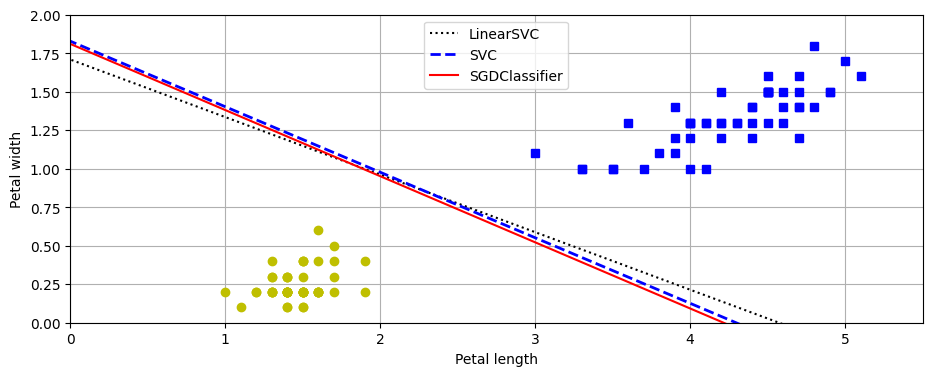

In [4]:
import matplotlib.pyplot as plt
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

In [5]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [6]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target,random_state=42)

In [10]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [11]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int64

In [12]:
lin_clf = LinearSVC(dual=True, random_state=42)
lin_clf.fit(X_train,y_train)

c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,penalty,'l2'
,loss,'squared_hinge'
,dual,True
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [13]:
lin_clf = LinearSVC(max_iter=1_000_000, dual=True, random_state=42)
lin_clf.fit(X_train,y_train)

c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,penalty,'l2'
,loss,'squared_hinge'
,dual,True
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf,X_train,y_train).mean()

c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


np.float64(0.90997150997151)

In [16]:
from sklearn.pipeline import make_pipeline
lin_clf = make_pipeline(StandardScaler(),LinearSVC(dual=True,random_state=42))
lin_clf.fit(X_train,y_train)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,True
,tol,0.0001


In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf,X_train,y_train).mean()

np.float64(0.9774928774928775)

In [20]:
svm_clf = make_pipeline(StandardScaler(),SVC(random_state=42))
cross_val_score(svm_clf,X_train,y_train).mean()

np.float64(0.9698005698005698)

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    'svc__gamma': loguniform(0.001,0.1),
    'svc__C': uniform(1,10)
}

rnd_search_cv = RandomizedSearchCV(svm_clf,param_distrib,n_iter=100,cv=5,random_state=42)
rnd_search_cv.fit(X_train,y_train)
rnd_search_cv.best_estimator_

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,np.float64(9.925589984899778)
,kernel,'rbf'
,degree,3
,gamma,np.float64(0....6281799901188)


In [25]:
rnd_search_cv.best_score_

np.float64(0.9925925925925926)

In [26]:
rnd_search_cv.score(X_test,y_test)

0.9777777777777777

In [28]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.svm import LinearSVR

lin_svr = make_pipeline(StandardScaler(),LinearSVR(dual=True,random_state=42))
lin_svr.fit(X_train,y_train)

c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('standardscaler', ...), ('linearsvr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,epsilon,0.0
,tol,0.0001
,C,1.0
,loss,'epsilon_insensitive'


In [31]:
lin_svr = make_pipeline(StandardScaler(),LinearSVR(dual=True,max_iter=5000,random_state=42))
lin_svr.fit(X_train,y_train)

,steps,"[('standardscaler', ...), ('linearsvr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,epsilon,0.0
,tol,0.0001
,C,1.0
,loss,'epsilon_insensitive'


In [32]:
from sklearn.metrics import root_mean_squared_error

y_pred = lin_svr.predict(X_train)
rmse = root_mean_squared_error(y_train,y_pred)
rmse

0.979565447829459

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_reg = make_pipeline(StandardScaler(),SVR())

param_distrib = {
    'svr__gamma': loguniform(0.001,0.1),
    'svr__C': uniform(1,10)
}
rnd_search_cv = RandomizedSearchCV(svm_reg,param_distrib,
                                   n_iter=100,cv=3,random_state=42)
rnd_search_cv.fit(X_train[:2000],y_train[:2000])

,estimator,"Pipeline(step...svr', SVR())])"
,param_distributions,"{'svr__C': <scipy.stats....0027A935AB990>, 'svr__gamma': <scipy.stats....0027A9073DB90>}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [35]:
rnd_search_cv.best_estimator_

,steps,"[('standardscaler', ...), ('svr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,degree,3
,gamma,np.float64(0....1408196485979)
,coef0,0.0


In [36]:
-cross_val_score(rnd_search_cv.best_estimator_,X_train,y_train,
                 scoring='neg_root_mean_squared_error')

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

In [38]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)
rmse

0.5854732265172239